In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

r = 0.3703703703703704


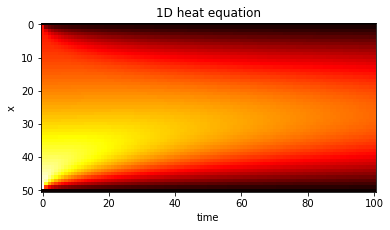

In [109]:
D, Nx, Nt = 1, 50, 300

x = np.linspace(0.0, 1.0, Nx+1)
dx = 1.5 / Nx
dt = 0.1 / Nt
r = D*dt / (dx*dx)
print ( "r = {}".format(r) )
assert r < 0.5

u = np.zeros( (Nx+1,Nt+1), dtype=float )  

# initial condition, t=0
for i in range(0,Nx+1):
    u[i] = np.exp(x[i])*dx
#     u[i] = x[i]**2 - (1-x[i])*dx


# boundary condition
u[0,:] = 0  
u[Nx,:] = np.abs(1-np.max(np.exp(x))) *dt

for j in range(Nt):
    u[1:-1,j+1] = r*u[:-2,j] + (1-2*r)*u[1:-1,j] + r*u[2:,j]

# print ( u )
plt.title("1D heat equation")
plt.xlabel("time") # odwrotnie!
plt.ylabel("x")

plt.imshow(u[:,::3], cmap='hot', interpolation='nearest')

plt.show()

r = 0.36


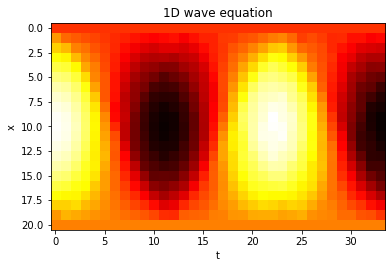

In [174]:
# Given mesh points as arrays x and t (x[i], t[j])
Nx, Nt, L, T = 20, 100, 1, 3
t = np.linspace(0, T, num=Nt+1, dtype=float)   # t in [0,T]
x = np.linspace(0, L, num=Nx+1, dtype=float)   # x in [0,L]
c = 1.0
dx = x[1] - x[0]
dt = t[1] - t[0]
r = (c*dt/dx)**2
assert r < 1
print ( "r = {}".format(r) )

u = np.empty( (Nx+1,Nt+1), dtype=float )  # all results

#initial conditions (in assertion)
for i in range(Nx+1):   
    u[i,0] = (x[i])*(1-x[i])
assert u[0,0] == 0 and u[Nx,0] == 0

# boundary conditions
u[0,:] = -dt
u[Nx,:] = dt

u[1:-1,1] = u[1:-1,0] + (r*0.5)*( u[:-2,0] -2*u[1:-1,0] + u[2:,0] )

for j in range(1,Nt):
    u[1:-1,j+1] = -u[1:-1,j-1] +2*u[1:-1,j] + r*(u[:-2,j] -2*u[1:-1,j] + u[2:,j])

plt.title("1D wave equation")
plt.xlabel("t")
plt.ylabel("x")

plt.imshow(u[:,::3], cmap='hot', interpolation='nearest')
plt.show()